# Change in molar entropy during a first-order phase transition

**Code:** #11D-000

**File:** `apps/van_der_waals/entropy.ipynb`

**Run it online:** [![Binder](https://mybinder.org/badge_logo.svg)](https://mybinder.org/v2/gh/jongablop/MinervaLab/master?urlpath=%2Fnotebooks%2Fapps%2Fvan_der_waals%2Fentropy.ipynb)

-----------

The aim of this notebook is to visualize the change in molar entropy during a first-orden liquid-gas transition.

## Interface

The main interface (``main_block_11D_000``) is divided in two HBox: ``top_block_11D_000`` and ``bottom_block_11D_000``. ``bottom_block_11D_000`` contains of 2 bqplot Figures: ``fig_11D_001`` and ``fig_11D_002``.  

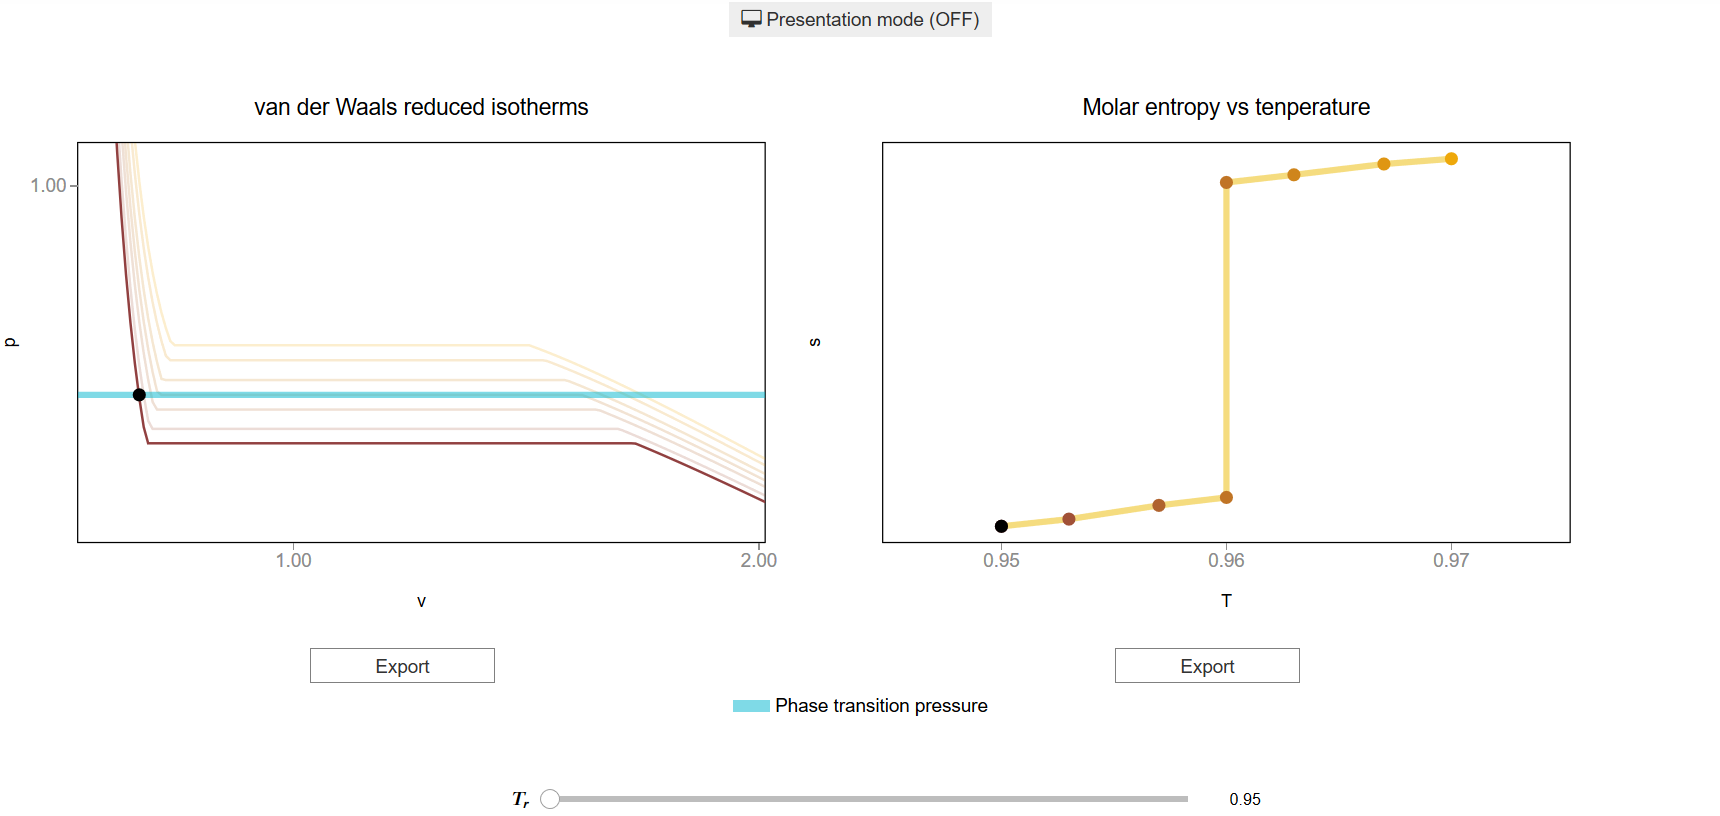

In [1]:
from IPython.display import Image
Image(filename='../../static/images/11D-000_1.png')

The slider ``T_slider`` updates the values of $T$ which updates the lines and scatter points of ``fig_11D_001`` and ``fig_11D_002``.

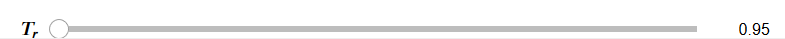

In [2]:
Image(filename='../../static/images/11D-000_2.png')

## CSS

A custom `css` file is used to improve the interface of this application. It can be found [here](https://github.com/jongablop/MinervaLab/blob/master/static/custom.css).

In [3]:
from IPython.display import HTML
display(HTML("<head><link rel='stylesheet' type='text/css' href='./../../static/custom.css'></head>"))
display(HTML("<style>.container { width:100% !important; } .jupyter-button {white-space: normal !important;}</style>"))

## Packages

In [4]:
from bqplot import *
import bqplot as bq
import bqplot.marks as bqm
import bqplot.scales as bqs
import bqplot.axes as bqa

import ipywidgets as widgets

from scipy.signal import argrelextrema

import urllib.parse
import webbrowser

import sys

## Physical functions

This are the functions that have a physical meaning:

- `get_relative_isotherms`
- `experimetal_isotherms`
- `get_roots`
- `p_indefinite_integral`
- `p_definite_integral`
- `find_real_fixed_p`
- `find_real_fixed_T`

In [5]:
def get_relative_isotherms(v_range, T_range):
    """This function calculates the theoretical p(v, T) plane 
        (in reduced coordinates) according to van der Waals
        equation of state from a given range of volumes
        and tenperatures.

    Args:
        v_range: An array containing the values of v
        (in reduced coordinates)for which the isotherms must be 
        calculated.\n
        T_range: An array containing the values of T
        (in reduced coordinates)for which the isotherms must be 
        calculated.\n

        
    Returns:
        isotherms: A list consisted of numpy arrays containing the
        pressures of each isotherm.
    """

    isotherms = []

    for T in T_range:
        p_R = []
        for v in v_range:
            val = (8.0/3.0*T/(v - 1.0/3.0) - 3.0/v**2)
            p_R = np.append(p_R, val)

        isotherms.append(p_R)

    return isotherms

In [6]:
def experimental_isotherms(p_range, v_range, T_range, fixed_p, fixed_T):
    """This function calculates the experimental p(v, T) plane 
        (in reduced coordinates) according to van der Waals
        equation of state for a given range of volumes
        and tenperatures or for a given range of volumes
        and pressures.

    Args:
        p_range: An array containing the values of p
        (in reduced coordinates)for which the isotherms must be 
        calculated. Only used if fixed_p == True.\n
        v_range: An array containing the values of v
        (in reduced coordinates)for which the isotherms must be 
        calculated.\n
        T_range: An array containing the values of v
        (in reduced coordinates)for which the isotherms must be 
        calculated. Only used if fixed_T == True.\n
        fixed_p: Boolean variable which represents if the isotherms 
        must be calculated for a given pressures.\n
        fixed_T: Boolean variable which represents if the isotherms 
        must be calculated for a given pressures.\n

        
    Returns:
        expe_data: A list consisted of numpy arrays containing the
        pressures of each theoretical isotherm.\n
        theo_data: A list consisted of numpy arrays containing the
        pressures of each theoretical isotherm.\n
        v_limits: A list consisted of arrays of the volume limits of
        the phase-transition of each subcritical isotherm.\n
        p_limits: A list consisted of arrays of the pressure limits of
        the phase-transition of each subcritical isotherm.\n
        tenperatures: A list consisted of the tenperatures of the
        isotherms.\n
    """
    
    if fixed_T:
    
        theo_data = get_relative_isotherms(v_range, T_range)
        expe_data = []

        v_limits = []
        p_limits = []

        p_range = np.linspace(0.001, 1.0, num=10000)
        pressures, v_isobaric_limits = find_real_fixed_T(p_range, T_range)

        for i in range(len(theo_data)):

            p_expe = []

            if i < len(v_isobaric_limits):

                    v_lim = v_isobaric_limits[i]

                    if len(v_lim) > 1: #check if there is only one point 
                        for j in range(len(v_range)):

                            if v_range[j] > v_lim[0] and v_range[j] < v_lim[1]:
                                p_expe.append(pressures[i])

                            else:
                                p_expe.append(theo_data[i][j])

                        v_limits = np.append(v_limits, [v_lim[0], v_lim[1]])
                        p_limits = np.append(p_limits, [pressures[i], pressures[i]])

                    else:
                        p_expe = theo_data[i]
                        v_limits = np.append(v_limits, [1.0])
                        p_limits = np.append(p_limits, [1.0])

            else:

                p_expe = theo_data[i]

            expe_data.append(p_expe)      

        tenperatures = T_range
        
        return expe_data, theo_data, p_limits, v_limits, tenperatures
    
    elif fixed_p:
        
        tenperatures, v_isobaric_limits = find_real_fixed_p(p_range, T_range)

        theo_data = get_relative_isotherms(v_range, tenperatures)
        expe_data = []

        v_limits = []
        p_limits = []
        
        for i in range(len(theo_data)):

            p_expe = []

            if i < len(v_isobaric_limits):

                    v_lim = v_isobaric_limits[i]

                    if len(v_lim) > 1: #check if there is only one point 
                        
                        for j in range(len(v_range)):

                            if v_range[j] > v_lim[0] and v_range[j] < v_lim[1]:
                                p_expe.append(p_range[i])

                            else:
                                p_expe.append(theo_data[i][j])

                        v_limits = np.append(
                            v_limits,
                            [v_lim[0],
                             v_lim[1]]
                        )
                        p_limits = np.append(
                            p_limits,
                            [p_range[i],
                             p_range[i]]
                        )

                    else:
                        p_expe = theo_data[i]
                        v_limits = np.append(v_limits, [1.0])
                        p_limits = np.append(p_limits, [1.0])

            else:

                p_expe = theo_data[i]

            expe_data.append(p_expe)      

        return expe_data, theo_data, p_limits, v_limits, tenperatures

In [7]:
def get_roots(p, T):
    """This function calculates the roots of a van der Waals
    isotherm of a given T and set of pressures.
    
    Args:
        p: Numpy array consisted of the pressures of the isotherm.\n
        T: Value of the tenperature.\n

    Returns:
        roots_in_range: A list consisted of the real roots.\n
    """
    
    
    roots = np.roots([1.0, - 1.0/3.0*(1.0 + 8.0*T/p), 3.0/p, -1.0/p])
    roots_in_range = []
    
    for root in roots:
        if np.isreal(root):
            root = np.real(root)
            if root > 0:
                roots_in_range.append(root)
    roots_in_range.sort()
    
    return roots_in_range

In [8]:
def p_indefinite_integral(p_0, v_0, T):
    """This function calculates the indefinite integral between
    a van der Waals isotherm and a isobaric line.
    
    Args:
        p0: Isobaric line's pressure.\n
        v0: Value of the volume.\n
        T: Value of the tenperature.\n

    Returns:
        integral: Value of the indefinite integral between a 
        van der Waals isotherm at T and a isobaric line of p0 at a
        volume v0.\n
    """
    
    integral = 8.0/3.0 * T *np.log(v_0 - 1.0/3.0) + 3.0/v_0 - p_0*v_0
    
    return integral

In [9]:
def definite_integral(p_0, v_range, T):
    """This function 'p_indefinite_integral' function to calculate
    the definite integral between a van der Waals isotherm and a
    isobaric line.
    
    Args:
        p0: Isobaric line's pressure.\n
        v_range: Tuple or list consisted of volume limits.\n
        T: Value of the tenperature.\n

    Returns:
        integral: Value of the definite integral between a 
        van der Waals isotherm at T and a isobaric line of p0 in a
        volume range v_range.\n
    """
    
    v_0, v_1 = v_range[0], v_range[1]
    
    integral = p_indefinite_integral(p_0, v_1, T) - p_indefinite_integral(p_0, v_0, T)
    
    return integral

In [10]:
def find_real_fixed_T(p_values, T_values):
    """This function uses Maxwell's construction to find the
       pressures in which phase transition happens given some
       fixed tenperatures.\n

    Args:
        p_values: List of pressures in which the real isotherm is
        searched.\n
        T_values: List of tenperatures of the isotherms.\n

        
    Returns:
        pressures: List of pressures in which phase transition
        happens.\n
        v_range: Volume limits of phase transition zones.
    """
    
    eps = 1e-3
    
    pressures = []
    v_ranges = []
    
    for T in T_values:
        
        if T < 1.0:
        
            for p in p_values:
                
                roots = get_roots(p, T)
                
                if len(roots) == 3:
                    
                    v_range = [roots[0], roots[2]]
                    area = definite_integral(p, v_range, T)
                    
                    if abs(area) < eps:
                        
                        pressures.append(p)
                        v_ranges.append(v_range)
                        
                        break
                        
        elif T == 1.0:
            
            pressures.append(1.0)
            v_ranges.append([1.0])

    return pressures, v_ranges

In [11]:
def find_real_fixed_p(p_values, T_values):
    """This function uses Maxwell's construction to find the
       tenperatures in which phase transition happens given some
       fixed pressures.\n

    Args:
        p_values: List of pressures of the isotherms.\n
        T_values: List of tenperatures in which the real isotherm is
        searched.\n 

        
    Returns:
        tenperatures: List of tenperatures in which phase transition
        happens.\n
        v_range: Volume limits of phase transition zones.
    """
    
    eps = 1e-3
    
    tenperatures = []
    v_ranges = []
    
    for p in p_values:
        
        if p < 1.0:
        
            for T in T_values:
                
                roots = get_roots(p, T)
                
                if len(roots) == 3:
                    
                    v_range = [roots[0], roots[2]]
                    area = definite_integral(p, v_range, T)
                    
                    if abs(area) < eps:
                        
                        tenperatures.append(T)
                        v_ranges.append(v_range)
                        
                        break
                        
        elif p == 1.0:
            
            tenperatures.append(1.0)
            v_ranges.append([1.0])

    return tenperatures, v_ranges

In [12]:
def get_entropy(v_values):
    """This function calculates the entropy for a given
    array of molar volumes.
    
    Args:
        v_values: Array consisted of the values of molar volume.
    
    Returns:
        s: Array containing the values of the entropy.
    """
    v_values = np.asarray(v_values)
    s = 8.0/3.0*np.log(3.0*v_values - 1.0)
    
    return s

## Functions related to the interaction

In [13]:
def find_nearest_index(array, value):
    """This function find index of the element in an array which
    value is the nearest to the given one.
    
    Args:
        array: A list or numpy array containing the elements.\n
        value: Float number.\n

    Returns:
        idx: Index of the element in array which value is the nearest
        to value.
    """
    
    array = np.asarray(array)
    idx = (np.abs(array - value)).argmin()
    return idx

In [14]:
def change_tenperature(change):
    
    index = change.owner.index
    
    opacities = [def_op for T in T_values]
    opacities[index] = 1.0
    
    isotherms.opacities = opacities
    
    if index == selected:
        
        state.x, state.y = state_v[index], [p_0, p_0]
        state_s.x, state_s.y = [T_values[index], T_values[index]], s_values[index]
        
    else:
        
        state.x, state.y = [state_v[index]], [p_0]
        state_s.x, state_s.y = [T_values[index]],[s_values[index]]

In [16]:
def change_view(change):
    """This function changes the visualization of all the
    components of the application so they are suitable for
    a projection.\n
    """
    
    obj = change.owner

    if obj.value:
        
        obj.description = 'Presentation mode (ON)'
        
        display(HTML(
            "<style>" \
            ".widget-readout { font-size: 30px ; }" \
            ".widget-label-basic {font-size: 30px;}" \
            "option {font-size: 25px;}" \
            ".p-Widget.jupyter-widgets.widget-slider.widget-vslider.widget-inline-vbox {width: auto}" \
            ".p-Widget .jupyter-widgets .widgets-label {width: auto; height: auto; font-size: 30px;}" \
            ".widget-label {font-size: 30px ; height: auto !important;}" \
            ".p-Widget .bqplot .figure .jupyter-widgets {height: auto !important;}" \
            ".widget-text input[type='number'] {font-size: 30px;height: auto;}" \
            ".option { font-size: 30px ;}" \
            ".p-Widget .jupyter-widgets .jupyter-button.widget-button {font-size: 30px ; width: auto; height: auto;}" \
            ".p-Widget.jupyter-widgets.jupyter-button.widget-toggle-button{font-size: 30px ; width: auto; height: auto;}" \
            ".p-Widget.p-Panel.jupyter-widgets.widget-container.widget-box.widget-vbox {padding-bottom: 30px}" \
            ".bqplot > svg .axis text.axislabel, .bqplot > svg .axis tspan.axislabel {font-size: 30px;}" \
            ".q-grid .slick-cell {font-size: 30px;}" \
            ".slick-column-name {font-size: 30px;}" \
            ".widget-html-content {font-size: 30px;}"
            "</style>"
            )
        )

        for figure in figures:
            
            figure.legend_text = {'font-size': '30px'}
            figure.title_style = {'font-size': '30px'}

            for axis in figure.axes:
                axis.tick_style = {'font-size': '30px'}
                axis.label_style = {'font-size': '30px'}
        
    else:
        
        obj.description = 'Presentation mode (OFF)'
        
        display(HTML(
            "<style>" \
            ".widget-readout { font-size: 14px ;}" \
            ".widget-label-basic {font-size: 14px;}" \
            "option {font-size: 12px;}" \
            ".p-Widget .jupyter-widgets .widgets-label {font-size: 14px;}" \
            ".widget-label {font-size: 14px ;}" \
            ".widget-text input[type='number'] {font-size: 14px;}" \
            ".option { font-size: 14px ;}" \
            ".p-Widget .jupyter-widgets .jupyter-button.widget-button {font-size: 14px;}" \
            ".p-Widget.jupyter-widgets.jupyter-button.widget-toggle-button {font-size: 14px;}" \
            ".bqplot > svg .axis text.axislabel, .bqplot > svg .axis tspan.axislabel {font-size: 14px;}" \
            ".q-grid .slick-cell {font-size: 14px;}" \
            ".slick-column-name {font-size: 14px;}" \
            ".widget-html-content {font-size: 14px;}"
            "</style>"
            )
        )
        
        for figure in figures:
            
            figure.legend_text = {'font-size': '14px'}
            figure.title_style = {'font-size': '20px'}

            for axis in figure.axes:
                axis.tick_style = {'font-size': '14px'}
                axis.label_style = {'font-size': '14px'}

In [17]:
def prepare_export(button):
    """This function sends the selected plot to the 'export_plot'
    function.
    """
    
    if button is prepare_export_fig_11D_001_button:
        
        export_plot(fig_11D_001)
        
    elif button is prepare_export_fig_11D_002_button:
        
        export_plot(fig_11D_002)

In [18]:
def export_plot(plot):
    """This function sends the selected plot to the export module.
    """
    
    global data
    
    text_lines = []
    
    np.set_printoptions(threshold=sys.maxsize)
    data =  repr((plot, text_lines))
    
    %store data
    
    rel_url = "../../../apps/modules/export_module.ipynb"
    abs_url = urllib.parse.urljoin(notebook_url, rel_url)

    if not webbrowser.open(abs_url):
        go_to_export_button.value = "<form action=" + abs_url + " target='_blank'><button type=''submit''>Open in export module</button></form>"

In [19]:
%%javascript 

//Get the URL of the current notebook

var kernel = Jupyter.notebook.kernel; 
var command = ["notebook_url = ",
               "'", window.location.href, "'" ].join('')

kernel.execute(command)

<IPython.core.display.Javascript object>

## Functions related to visualization

In [20]:
def hex_to_rgb(number_hex):
    """This function converts a hexadecimal color to its rgb
    equivalent.
    
    Args:
        number_hex: String containing the hexadecimal representation
        of the color.\n
        
    Returns:
        number_rgb: Tuple consisted of the 3 numbers of the rgb
        representation of the color.\n
    """
    
    if '#' in number_hex:
        number_hex = number_hex[1:]
    
    number_rgb = (int(number_hex[0:2], 16), \
                  int(number_hex[2:4], 16), \
                  int(number_hex[4:], 16))
    
    return number_rgb

In [21]:
def rgb_to_hex(number_rgb):
    """This function converts a rgb color to its hexadecimal
    equivalent.
    
    Args:
        number_rgb: Tuple consisted of the 3 numbers of the rgb
        representation of the color.\n
        
    Returns:
        number_hex: String containing the hexadecimal representation
        of the color.\n
    """
    
    number_rgb = '#' \
    + format(number_rgb[0], '02x') \
    + format(number_rgb[1], '02x') \
    + format(number_rgb[2], '02x')
    
    return number_rgb

In [22]:
def generate_gradient(initial, final, length):
    """This function generates a color gradient consisted of N
    colors from the initial to the final.
    
    Args:
        initial: String of the hexadecimal representation of the
        initial color.\n
        final: String of the hexadecimal representation of the
        final color.\n
        length: Number of colors.\n
        
    Returns:
        colors: List consisted of strings of the hexadecimal
        colors.\n
    """
    
    i_r, i_g, i_b = hex_to_rgb(initial)
    f_r, f_g, f_b = hex_to_rgb(final)
    
    r_step = (f_r - i_r)/length
    g_step = (f_g - i_g)/length
    b_step = (f_b - i_b)/length
    
    r, g, b = i_r, i_g, i_b
    colors = []
    
    for i in range(length):

        h = rgb_to_hex((int(round(r)),int(round(g)),int(round(b))))
        
        colors.append(h)
        
        r = r + r_step
        g = g + g_step
        b = b + b_step

    return colors

## Main interface

In [ ]:
T_values = np.round(np.linspace(0.95, 0.97, 7), 3)
v_values = np.linspace(0.45, 5.2, 500)

colors = generate_gradient('#914040', '#feb901', len(T_values)) 

def_op = 0.2
opacities = [def_op for T in T_values]
opacities[0] = 1.0

data = experimental_isotherms(
    p_range=[],
    v_range=v_values,
    T_range=T_values,
    fixed_T = True,
    fixed_p = False
)

expe_p_values = data[0]
theo_p_values = data[1]

p_limits = data[2]
v_limits = data[3]
T_limits = data[4]

# The index of the pressure of the selected isotherm
selected = 3

p_0 = np.unique(p_limits)[selected]

state_v = []
T_values_repeated = []
colors_repeated = []

for i in range(len(T_values)):
    
    if i == selected:
        
        state_v.append(
            np.array([v_limits[2*i],v_limits[2*i+1]])
        )
        
        T_values_repeated.append(
            T_values[i]
        )
        
        colors_repeated.append(colors[i])
        
    else:
        
        idx = find_nearest_index(expe_p_values[i], p_0)
        state_v.append(v_values[idx])
        
    T_values_repeated.append(
        T_values[i]
    )
    
    colors_repeated.append(colors[i])

s_values = []

for v in state_v:
    s_values.append(get_entropy(v))

s_values_plain = np.hstack(s_values)    

##########################
########TOP BLOCK#########
##########################

top_block_11D_000 = widgets.HBox(
    [],
    layout=widgets.Layout(
        align_items='center',
        width='100%'
    )
)

# fig_11D_001

scale_x_11D_001 = bqs.LinearScale(min = 0.55, max = 2.0)
scale_y_11D_001 = bqs.LinearScale(min = 0.75, max = 1.02)

axis_x_11D_001 = bqa.Axis(
    scale=scale_x_11D_001,
    tick_format='0.2f',
    tick_style={'font-size': '15px'},
    tick_values=[1.0, 2.0, 3.0, 4.0, 5.0],
    grid_lines = 'none',
    grid_color = '#8e8e8e', 
    label='v',
    label_location='middle',
    label_style={'stroke': 'black', 'default-size': 35},
    label_offset='50px'
)

axis_y_11D_001 = bqa.Axis(
    scale=scale_y_11D_001,
    tick_format='0.2f',
    tick_style={'font-size': '15px'},
    tick_values=[0.0, 1.0],
    grid_lines = 'none',
    grid_color = '#8e8e8e', 
    orientation='vertical',
    label='p',
    label_location='middle',
    label_style={'stroke': 'red', 'default_size': 35},
    label_offset='50px'
)

isotherms = bqm.Lines(
    x = np.array([v_values]), 
    y = np.array([expe_p_values]), 
    scales = {'x': scale_x_11D_001, 'y': scale_y_11D_001}, 
    opacities = opacities,
    visible = True, 
    colors = colors,
    labels = [str(t) for t in T_limits],  
)

isobaric = bqm.Lines(
    x = [v_values[0], v_values[-1]], 
    y = np.array([p_0, p_0]), 
    scales = {'x': scale_x_11D_001, 'y': scale_y_11D_001}, 
    opacities = [0.5],
    visible = True, 
    colors = ['#01b6cf'],
    stroke_width = 5,
)

state = bqm.Scatter(
    x = [state_v[0]],
    y = [p_0],
    scales = {'x': scale_x_11D_001, 'y': scale_y_11D_001}, 
    visible = True,
    colors = ['black'],
    names = [],
    #tooltip = tt
) 

fig_11D_001 = bq.Figure(
    title='van der Waals reduced isotherms',
    marks=[],
    axes=[axis_x_11D_001, axis_y_11D_001],
    animation_duration=0,
    layout = widgets.Layout(
        align_self='center',
    ),
    legend_location='top-right',
    background_style= {'fill': 'white','stroke': 'black'},
    fig_margin=dict(top=80,bottom=80,left=60,right=30),
    toolbar = True
)

fig_11D_001.marks = [
    isotherms,
    isobaric,
    state
]

# fig_11D_002

scale_x_11D_002 = bqs.LinearScale(min=0.945, max=0.975)
scale_y_11D_002 = bqs.LinearScale()

axis_x_11D_002 = bqa.Axis(
    scale=scale_x_11D_002,
    tick_format='0.2f',
    tick_style={'font-size': '15px'},
    tick_values=[0.95, 0.96, 0.97],
    grid_lines = 'none',
    grid_color = '#8e8e8e', 
    label='T',
    label_location='middle',
    label_style={'stroke': 'black', 'default-size': 35},
    label_offset='50px'
)

axis_y_11D_002 = bqa.Axis(
    scale=scale_y_11D_002,
    tick_format='0.2f',
    tick_style={'font-size': '15px'},
    num_ticks=0,
    grid_lines = 'none',
    grid_color = '#8e8e8e', 
    orientation='vertical',
    label='s',
    label_location='middle',
    label_style={'stroke': 'red', 'default_size': 35},
    label_offset='50px'
)

entropy_line = bqm.Lines(
    x = T_values_repeated, 
    y = s_values_plain, 
    scales = {'x': scale_x_11D_002, 'y': scale_y_11D_002}, 
    opacities = [0.5],
    visible = True, 
    colors = ['#edba00'],
    labels = [str(t) for t in T_limits],
    stroke_width = 5,
)

entropy_scatter = bqm.Scatter(
    x = T_values_repeated, 
    y = s_values_plain, 
    scales = {'x': scale_x_11D_002, 'y': scale_y_11D_002}, 
    opacities = opacities,
    visible = True, 
    colors = colors_repeated,
    labels = [str(t) for t in T_limits],
)

state_s = bqm.Scatter(
    x = [T_values[0]],
    y = [s_values_plain[0]],
    scales = {'x': scale_x_11D_002, 'y': scale_y_11D_002}, 
    visible = True,
    colors = ['black'],
    names = [],
) 

fig_11D_002 = bq.Figure(
    title='Molar entropy vs tenperature',
    marks=[],
    axes=[axis_x_11D_002, axis_y_11D_002],
    animation_duration=0,
    layout = widgets.Layout(
        align_self='center',
    ),
    legend_location='top-right',
    background_style= {'fill': 'white','stroke': 'black'},
    fig_margin=dict(top=80,bottom=80,left=60,right=30),
    toolbar = True
)

fig_11D_002.marks = [
    entropy_line,
    entropy_scatter,
    state_s
]

prepare_export_fig_11D_001_button = widgets.Button(
    description='Export',
    disabled=False,
    button_style='',
    tooltip='',
    layout = widgets.Layout(
        align_self='center'
    )
)

prepare_export_fig_11D_001_button.on_click(prepare_export)

prepare_export_fig_11D_002_button = widgets.Button(
    description='Export',
    disabled=False,
    button_style='',
    tooltip='',
    layout = widgets.Layout(
        align_self='center'
    )
)

prepare_export_fig_11D_002_button.on_click(prepare_export)

top_block_11D_000.children = [
    widgets.VBox([
        fig_11D_001,
        prepare_export_fig_11D_001_button
    ]),
    widgets.VBox([
        fig_11D_002,
        prepare_export_fig_11D_002_button
    ])
]

bottom_block_11D_000 = widgets.VBox(
    [],
    layout=widgets.Layout(
        align_items='center',
        width='100%'
    )
)

isobaric_line =  widgets.HTML(
    value="<div style='width:30px;text-align:left;display:inline-block;" \
          + "border: 5px solid #01b6cf;opacity: 0.5'> </div>" \
          + "  Phase transition pressure"
)

T_slider = widgets.SelectionSlider(
    options=T_values,
    value=T_values[0],
    description=r'\( T_r \)',
    disabled=False,
    continuous_update=True,
    orientation='horizontal',
    readout=True,
    layout = widgets.Layout(
        width = '50%',
        margin = '45px 0 0 0'
    )
)

T_slider.observe(change_tenperature, 'value')

bottom_block_11D_000.children = [
    isobaric_line,
    T_slider
]

change_view_button = widgets.ToggleButton(
    value=False,
    description='Presentation mode (OFF)',
    disabled=False,
    button_style='',
    tooltip='',
    icon='desktop',
    layout=widgets.Layout(
        width='initial',
        align_self='center'
    )
)

change_view_button.observe(change_view, 'value')

main_block_11D_000 = widgets.VBox(
    [],
    layout=widgets.Layout(
        align_items='center',
        width='100%'
    )
)

main_block_11D_000.children = [
    change_view_button,
    top_block_11D_000,
    bottom_block_11D_000,
]

figures = [
    fig_11D_001,
    fig_11D_002
]

main_block_11D_000